In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

In [3]:
data = pd.read_csv("house_price_train.csv")
data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1166         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2007        WD         Normal     128000  
1        10   2007        WD         Normal     268000  
2         6   2007        WD         Normal     269790  
3         1   2010       COD         Normal     190000  
4         6   2009        WD         Normal     215000  
...     ...    ...       ...            ...        ...  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1166      7   2008        WD         Normal      40000  
1167      6   2006        WD         Normal     183200  

[1168 rows x 81 columns]

In [5]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [132]:
#df = data.drop(['Id', 'Alley', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'TotRmsAbvGrd', 'Functional', 'MiscVal'], axis=1)
#df

In [6]:
df = data
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

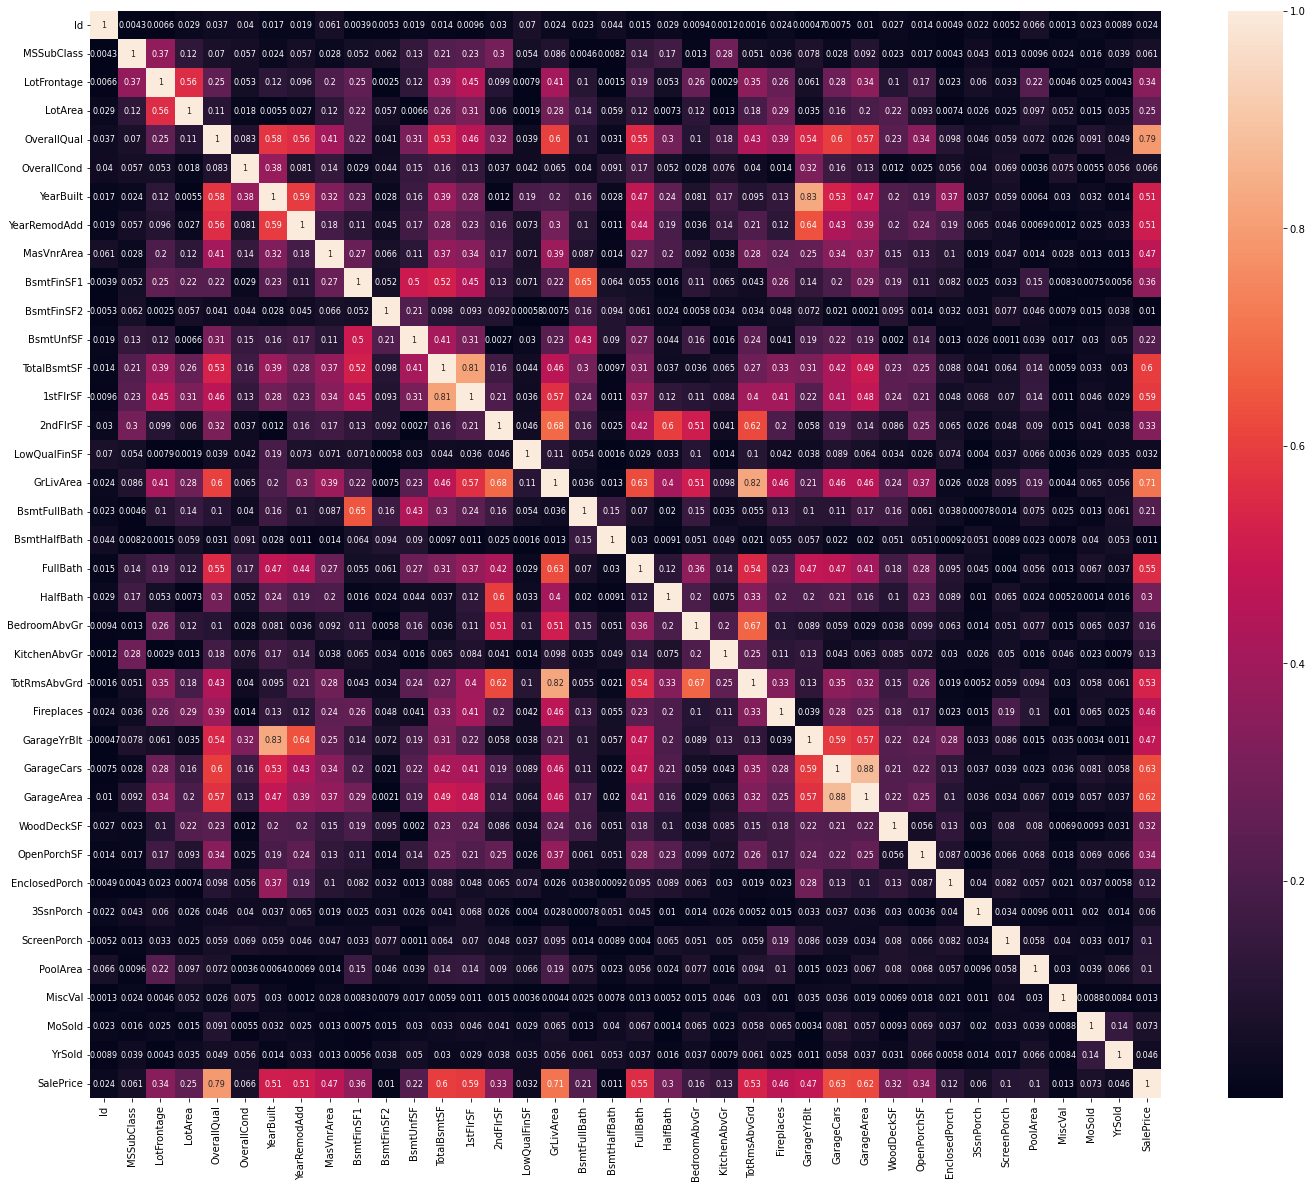

In [7]:
#heatmap
df_corr = df.corr().abs()
plt.figure(figsize=(24,20))
sns.heatmap(df_corr, annot=True, annot_kws={'size':8})
plt.show()

In [8]:
new_df = data.drop(['MSSubClass', 'MSZoning', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LandSlope', 'BldgType',
       'HouseStyle', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition'], axis=1)
new_df

Id  LotFrontage Alley LotConfig Neighborhood Condition1 Condition2  \
0     127          NaN   NaN    Inside      NPkVill       Norm       Norm   
1     889         95.0   NaN    Inside        NAmes       Norm       Norm   
2     793         92.0   NaN   CulDSac      NoRidge       Norm       Norm   
3     110        105.0   NaN    Inside       NWAmes       Norm       Norm   
4     422          NaN   NaN       FR2       NWAmes       Norm       Norm   
...   ...          ...   ...       ...          ...        ...        ...   
1163  289          NaN   NaN    Inside       Sawyer       Norm       Norm   
1164  554         67.0   NaN    Inside      Edwards      Feedr       Norm   
1165  196         24.0   NaN       FR2      NPkVill       Norm       Norm   
1166   31         50.0  Pave    Inside       IDOTRR      Feedr       Norm   
1167  617          NaN   NaN    Inside      Gilbert       Norm       Norm   

      OverallQual  YearBuilt  YearRemodAdd  ... TotRmsAbvGrd Functional  \
0               6       1976          1976  ...            5        Typ   
1               8       1970          1970  ...            8        Typ   
2               7       1996          1997  ...            8        Typ   
3               6       1977          1977  ...            7        Typ   
4               6       1977          2000  ...            8        Typ   
...           ...        ...           ...  ...          ...        ...   
1163            5       1967          1967  ...            5        Typ   
1164            4       1949          2003  ...            5        Typ   
1165            6       1976          1976  ...            7        Typ   
1166            4       1920          1950  ...            6        Typ   
1167            6       2002          2003  ...            7        Typ   

     Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0             1       1977.0           2         440           0          205   
1             1       1970.0           2         621          81          207   
2             1       1997.0           2         455         180          130   
3             1       1977.0           2         546           0          122   
4             1       1977.0           2         529         240            0   
...         ...          ...         ...         ...         ...          ...   
1163          0       1970.0           1         280           0            0   
1164          0       2002.0           2         520           0           96   
1165          1       1976.0           2         440          87            0   
1166          0       1920.0           1         250           0           54   
1167          1       2002.0           2         393         100           75   

      MiscVal  SalePrice  
0           0     128000  
1           0     268000  
2           0     269790  
3           0     190000  
4           0     215000  
...       ...        ...  
1163        0     122000  
1164        0     108000  
1165        0     148500  
1166        0      40000  
1167        0     183200  

[1168 rows x 31 columns]

In [9]:
# to find all null values
new_df[new_df.columns[new_df.isnull().any()]].isnull().sum()
#data[data.columns[data.isnull().any()]].isnull().sum()

LotFrontage     214
Alley          1091
MasVnrType        7
MasVnrArea        7
GarageYrBlt      64
dtype: int64

In [10]:
# fill null values by mode
new_df['LotFrontage'] = new_df['LotFrontage'].fillna(data['LotFrontage'].mode()[0])
new_df['LotFrontage'].isnull().sum()

0

In [ ]:
# new_df.dtypes

In [55]:
new_df['Functional'].unique()

array(['Typ', 'Mod', 'Maj1', 'Min1', 'Min2', 'Sev', 'Maj2'], dtype=object)

# Fill null values by mode

In [11]:
# fill null values by mode
new_df['Alley'] = new_df['Alley'].fillna(data['Alley'].mode()[0])
new_df['Alley'].isnull().sum()

0

In [12]:
new_df['MasVnrArea'] = new_df['MasVnrArea'].fillna(data['MasVnrArea'].mode()[0])
new_df['MasVnrArea'].isnull().sum()

0

In [13]:
# fill null 
new_df['MasVnrType'] = new_df['MasVnrType'].fillna(data['MasVnrType'].mode()[0])
new_df['MasVnrType'].isnull().sum()

0

In [14]:
# fill null 
new_df['GarageYrBlt'] = new_df['GarageYrBlt'].fillna(data['GarageYrBlt'].mode()[0])
new_df['GarageYrBlt'].isnull().sum()

0

In [15]:
new_df[new_df.columns[new_df.isnull().any()]].isnull().sum()

Series([], dtype: float64)

In [72]:
new_df.dtypes

Id                int64
LotFrontage     float64
Alley            object
LotConfig        object
Neighborhood     object
Condition1       object
Condition2       object
OverallQual       int64
YearBuilt         int64
YearRemodAdd      int64
Exterior1st      object
Exterior2nd      object
MasVnrType       object
MasVnrArea      float64
BsmtFinSF1        int64
TotalBsmtSF       int64
1stFlrSF          int64
2ndFlrSF          int64
GrLivArea         int64
FullBath          int64
HalfBath          int64
TotRmsAbvGrd      int64
Functional       object
Fireplaces        int64
GarageYrBlt     float64
GarageCars        int64
GarageArea        int64
WoodDeckSF        int64
OpenPorchSF       int64
MiscVal           int64
SalePrice         int64
dtype: object

In [16]:
new_df.columns

Index(['Id', 'LotFrontage', 'Alley', 'LotConfig', 'Neighborhood', 'Condition1',
       'Condition2', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MiscVal', 'SalePrice'],
      dtype='object')

# convert string to int from label encoder

In [79]:
labelencoder = LabelEncoder()
new_df['Alley'] = labelencoder.fit_transform(new_df['Alley'])
new_df['LotConfig'] = labelencoder.fit_transform(new_df['LotConfig'])
new_df['Neighborhood'] = labelencoder.fit_transform(new_df['Neighborhood'])
new_df['Condition1'] = labelencoder.fit_transform(new_df['Condition1'])
new_df['Condition2'] = labelencoder.fit_transform(new_df['Condition2'])
new_df['Exterior1st'] = labelencoder.fit_transform(new_df['Exterior1st'])
new_df['Exterior2nd'] = labelencoder.fit_transform(new_df['Exterior2nd'])
new_df['MasVnrType'] = labelencoder.fit_transform(new_df['MasVnrType'])
new_df['Functional'] = labelencoder.fit_transform(new_df['Functional'])

C:\Users\mohsi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

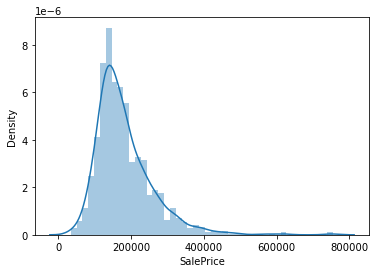

In [133]:
sns.distplot(new_df.SalePrice)

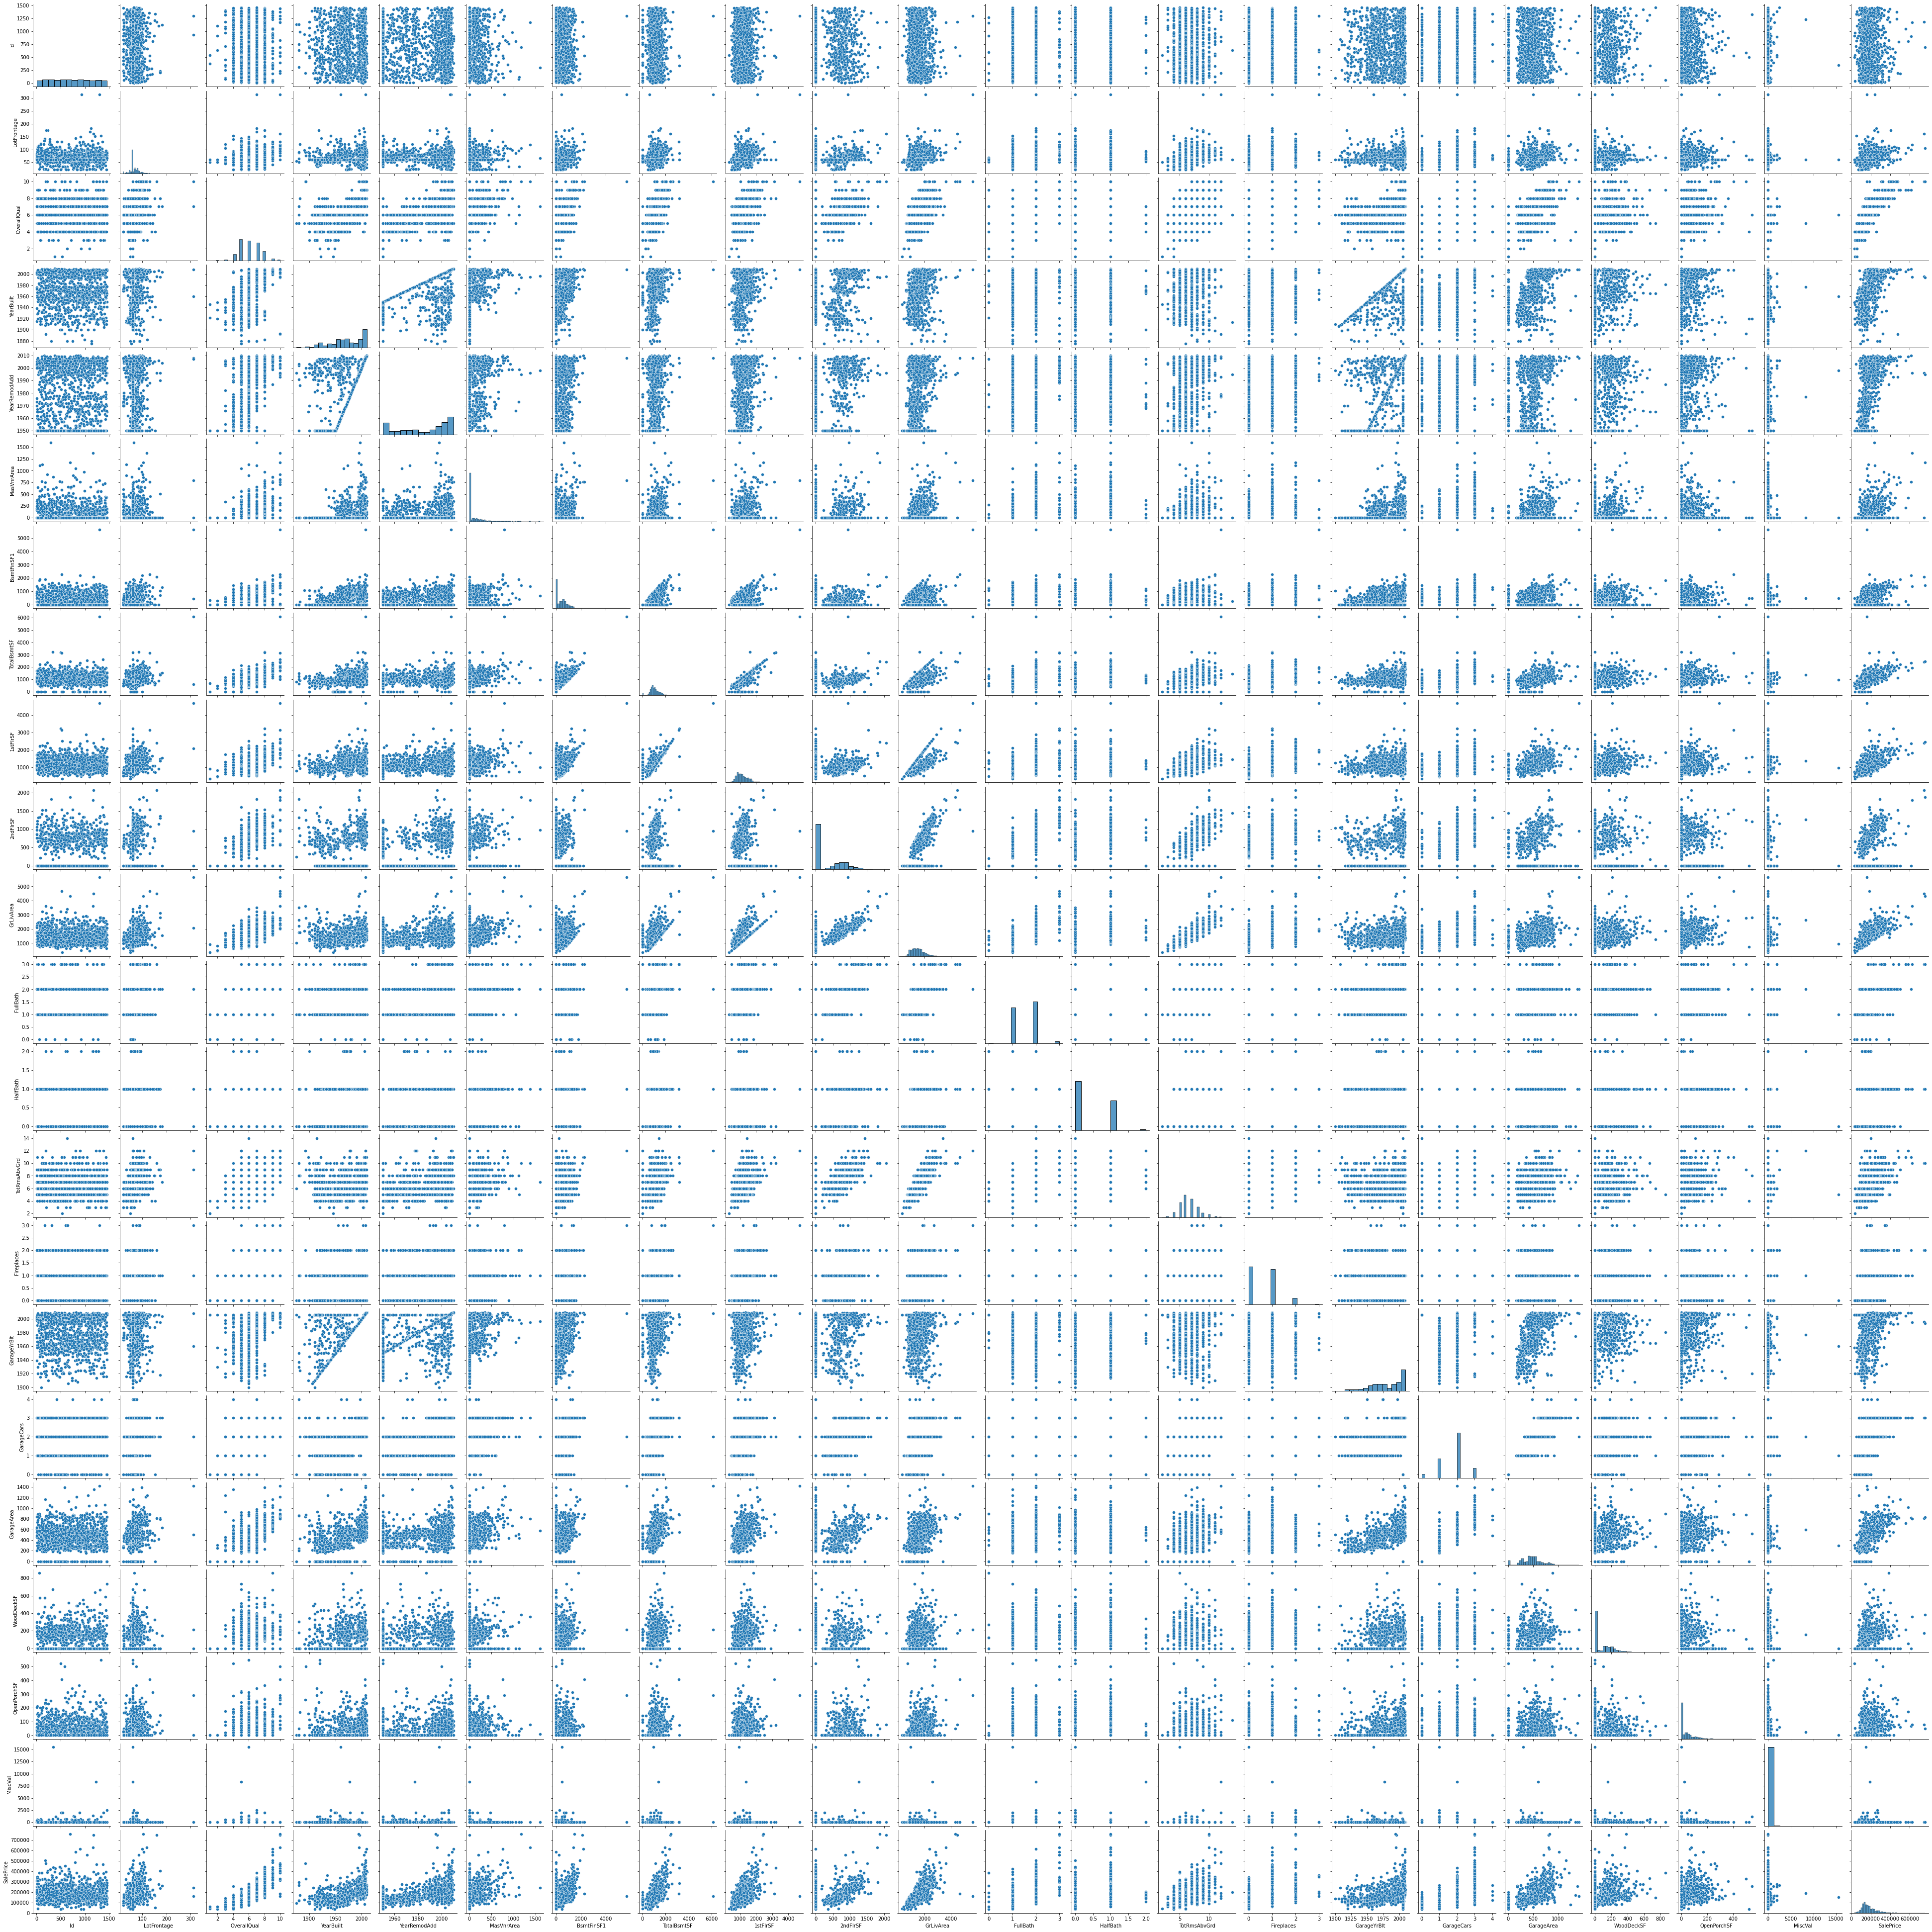

In [17]:
sns.pairplot(new_df)

# Splitting the data into train and test sets

In [18]:
new_df.columns

Index(['Id', 'LotFrontage', 'Alley', 'LotConfig', 'Neighborhood', 'Condition1',
       'Condition2', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MiscVal', 'SalePrice'],
      dtype='object')

In [21]:
test = pd.read_csv('house_price_test.csv')

In [56]:
test = test.drop(['MSSubClass', 'MSZoning', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LandSlope', 'BldgType',
       'HouseStyle', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition'], axis=1)
test

Id  LotFrontage Alley LotConfig Neighborhood Condition1 Condition2  \
0     337         86.0   NaN    Corner      StoneBr       Norm       Norm   
1    1018          NaN   NaN   CulDSac      StoneBr       Norm       Norm   
2     929          NaN   NaN    Inside      CollgCr       Norm       Norm   
3    1148         75.0   NaN    Inside      Crawfor       Norm       Norm   
4    1227         86.0   NaN   CulDSac      Somerst      Feedr       Norm   
..    ...          ...   ...       ...          ...        ...        ...   
287    83         78.0   NaN    Inside      Somerst       Norm       Norm   
288  1048         57.0   NaN    Inside      CollgCr       Norm       Norm   
289    17          NaN   NaN   CulDSac        NAmes       Norm       Norm   
290   523         50.0   NaN    Corner      BrkSide      Feedr       Norm   
291  1379         21.0   NaN    Inside       BrDale       Norm       Norm   

     OverallQual  YearBuilt  YearRemodAdd  ... HalfBath TotRmsAbvGrd  \
0              9       2005          2006  ...        0            8   
1              8       1984          1984  ...        0            4   
2              8       2001          2001  ...        0            7   
3              7       1941          1950  ...        1            7   
4              6       2007          2007  ...        1            9   
..           ...        ...           ...  ...      ...          ...   
287            8       2007          2007  ...        0            6   
288            5       1994          1995  ...        0            5   
289            6       1970          1970  ...        0            5   
290            6       1947          1950  ...        0            7   
291            6       1973          1973  ...        1            5   

    Functional  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  \
0          Typ           1       2005.0           3         676         178   
1          Typ           1       1984.0           2         565          63   
2          Typ           1       2001.0           2         522         202   
3          Typ           1       1941.0           1         234           0   
4          Typ           1       2007.0           3         668         100   
..         ...         ...          ...         ...         ...         ...   
287        Typ           1       2007.0           3         758         144   
288        Typ           0       1996.0           2         672           0   
289        Typ           1       1970.0           2         480           0   
290        Typ           2       1950.0           2         420           0   
291        Typ           0       1973.0           1         264          72   

     OpenPorchSF  MiscVal  
0             51        0  
1              0        0  
2            151        0  
3              0        0  
4             18        0  
..           ...      ...  
287           99        0  
288            0        0  
289            0      700  
290           24        0  
291            0        0  

[292 rows x 30 columns]

In [57]:
test[test.columns[test.isnull().any()]].isnull().sum()

LotFrontage     45
Alley          278
MasVnrType       1
MasVnrArea       1
GarageYrBlt     17
dtype: int64

In [62]:
# fill null values by mode
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(data['GarageYrBlt'].mode()[0])
test['GarageYrBlt'].isnull().sum()

0

In [74]:
labelencoder = LabelEncoder()
test['Alley'] = labelencoder.fit_transform(test['Alley'])
test['LotConfig'] = labelencoder.fit_transform(test['LotConfig'])
test['Neighborhood'] = labelencoder.fit_transform(test['Neighborhood'])
test['Condition1'] = labelencoder.fit_transform(test['Condition1'])
test['Condition2'] = labelencoder.fit_transform(test['Condition2'])
test['Exterior1st'] = labelencoder.fit_transform(test['Exterior1st'])
test['Exterior2nd'] = labelencoder.fit_transform(test['Exterior2nd'])
test['MasVnrType'] = labelencoder.fit_transform(test['MasVnrType'])
test['Functional'] = labelencoder.fit_transform(test['Functional'])

In [80]:
# Model Training
X=new_df.drop('SalePrice', axis=1)
y=new_df['SalePrice']

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=8)

In [119]:
clf = DecisionTreeRegressor()

In [120]:
clf.fit(X_train, y_train)

DecisionTreeRegressor()

In [121]:
prediction= clf.predict(X_test)

In [122]:
accuracy_score(y_test, prediction)*100

1.36986301369863

In [123]:
# decison tree
dc = DecisionTreeRegressor()

In [124]:
dc.fit(X_train, y_train)

DecisionTreeRegressor()

In [125]:
dc_prediction= dc.predict(X_test)

In [126]:
accuracy_score(y_test, dc_prediction)*100

1.36986301369863

In [127]:
# KNN classification algo
kn = KNeighborsClassifier()

In [128]:
kn.fit(X_train, y_train)

KNeighborsClassifier()

In [129]:
kn_prediction= kn.predict(X_test)

In [130]:
accuracy_score(y_test, kn_prediction)*100

0.3424657534246575